# Step 1. Data collection

In [27]:
import kagglehub
import pandas as pd
from pathlib import Path

In [28]:
path = kagglehub.dataset_download("neisse/scrapped-lyrics-from-6-genres")
datasets_path = Path(path)

artists_data_path = datasets_path / "artists-data.csv"
lyrics_data_path = datasets_path / "lyrics-data.csv"

lyrics_df = pd.read_csv(lyrics_data_path)
artists_df = pd.read_csv(artists_data_path)
print(artists_df.head(2))
lyrics_df.head()

                Artist               Genres  Songs  Popularity  \
0        Ivete Sangalo  Pop; Axé; Romântico  313.0         4.4   
1  Chiclete com Banana                  Axé  268.0         3.8   

                    Link  
0        /ivete-sangalo/  
1  /chiclete-com-banana/  


,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [29]:
english_lyrics_df = lyrics_df[lyrics_df['language'] == 'en'].copy()
print(f"Total English songs: {len(english_lyrics_df)}")
english_lyrics_df.head()

Total English songs: 191814


,ALink,SName,SLink,Lyric,language
69,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en
86,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en
88,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en
111,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en
140,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en


In [30]:
# Merge to attach genres and artist names to each lyric
merged_df = english_lyrics_df.merge(
    artists_df[['Artist', 'Genres', 'Link']],
    left_on='ALink',
    right_on='Link',
    how='left'
)

# Drop duplicates and unnecessary columns
merged_df = merged_df.drop(columns=['Link'])
merged_df = merged_df.dropna(subset=['Genres', 'Lyric'])
merged_df.head()


,ALink,SName,SLink,Lyric,language,Artist,Genres
0,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en,Ivete Sangalo,Pop; Axé; Romântico
1,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en,Ivete Sangalo,Pop; Axé; Romântico
2,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en,Ivete Sangalo,Pop; Axé; Romântico
3,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en,Ivete Sangalo,Pop; Axé; Romântico
4,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en,Ivete Sangalo,Pop; Axé; Romântico


In [31]:
# Keep only the first listed genre for simplicity
merged_df['Main_Genre'] = merged_df['Genres'].apply(lambda x: x.split(';')[0].strip())
merged_df['Main_Genre'].value_counts().head(10)


Main_Genre
Rock                25177
Pop                 13759
Heavy Metal         13496
Indie               12998
Rap                  9589
Pop/Rock             9019
Hip Hop              8412
Country              7377
Rock Alternativo     5555
R&B                  5309
Name: count, dtype: int64

In [33]:
selected_genres = ['Pop', 'Rock', 'Hip Hop', 'Country']

sample_df = (
    merged_df[merged_df['Main_Genre'].isin(selected_genres)]
    .groupby('Main_Genre')
    .apply(lambda x: x.sample(10, random_state=42))
    .reset_index(drop=True)
)

print(sample_df['Main_Genre'].value_counts())
sample_df.head()

Main_Genre
Country    10
Hip Hop    10
Pop        10
Rock       10
Name: count, dtype: int64


/tmp/ipykernel_38355/1508303702.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(10, random_state=42))


,ALink,SName,SLink,Lyric,language,Artist,Genres,Main_Genre
0,/willie-nelson/,Down In The Everglades,/willie-nelson/down-in-the-everglades.html,Theres a boat race down the river\nTheres a sl...,en,Willie Nelson,Country,Country
1,/george-strait/,She Took The Wind From His Sails,/george-strait/s.html,Outer banks of North Carolina\nLies a sleepy h...,en,George Strait,Country,Country
2,/bill-monroe/,Traveling On And On,/bill-monroe/traveling-on-and-on.html,Oh I was lost in the darkness and I wandered a...,en,Bill Monroe,Country; Black Music,Country
3,/hank-williams/,A Message To My Mother,/hank-williams/a-message-to-my-mother.html,CHORUS\nTake this message to my mother\nIt wil...,en,Hank Williams,Country,Country
4,/keith-urban/,God Whispered Your Name,/keith-urban/god-whispered-your-name.html,I was so cold and lost\nAnd nothing seemed to ...,en,Keith Urban,Country,Country


# Step 2. Preprocessing

In [ ]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

In [ ]:
def preprocess_lyrics(text):
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Process with spaCy
    doc = nlp(text)
    
    # Remove stopwords and lemmatize
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in STOP_WORDS]
    
    return " ".join(tokens)

In [ ]:
import pandas as pd
from tqdm import tqdm

tqdm.pandas()
sample_df["Cleaned_Lyric"] = sample_df["Lyric"].progress_apply(preprocess_lyrics)

100%|██████████| 40/40 [00:01<00:00, 20.37it/s]


In [39]:
sample_df[['SName', 'Lyric', 'Cleaned_Lyric']].head(3)

,SName,Lyric,Cleaned_Lyric
0,Down In The Everglades,Theres a boat race down the river\nTheres a sl...,s boat race river s slow boat mind everybodys ...
1,She Took The Wind From His Sails,Outer banks of North Carolina\nLies a sleepy h...,outer bank north carolina lie sleepy harbor to...
2,Traveling On And On,Oh I was lost in the darkness and I wandered a...,oh lose darkness wander astray help way hear j...


# Step 3. Frequency analysis

In [ ]:
sample_df["Tokens"] = sample_df["Cleaned_Lyric"].apply(lambda x: x.split())
sample_df[["Main_Genre", "SName", "Tokens"]].head(3)

,Main_Genre,SName,Tokens
0,Country,Down In The Everglades,"[s, boat, race, river, s, slow, boat, mind, ev..."
1,Country,She Took The Wind From His Sails,"[outer, bank, north, carolina, lie, sleepy, ha..."
2,Country,Traveling On And On,"[oh, lose, darkness, wander, astray, help, way..."


In [42]:
from collections import Counter

# Create a dictionary to store frequency counts for each genre
genre_word_freq = {}

for genre, group in sample_df.groupby("Main_Genre"):
    all_words = [word for tokens in group["Tokens"] for word in tokens]
    word_freq = Counter(all_words)
    genre_word_freq[genre] = word_freq

In [46]:
for genre, freq in genre_word_freq.items():
    print(f"\n🎵 Top 10 words in {genre}:")
    for word, count in freq.most_common(10):
        print(f"{word:<15} {count}")


🎵 Top 10 words in Country:
s               27
go              27
not             26
m               25
love            25
to              21
like            18
know            16
hallelujah      16
come            14

🎵 Top 10 words in Hip Hop:
like            64
not             64
come            49
m               47
ready           38
feel            36
cause           36
know            33
get             32
go              24

🎵 Top 10 words in Pop:
get             66
na              54
not             46
oh              36
to              35
come            30
love            24
ready           23
stop            22
m               20

🎵 Top 10 words in Rock:
love            21
not             20
like            18
away            16
fall            15
surrender       14
d               13
velvet          13
goldmine        13
belong          13


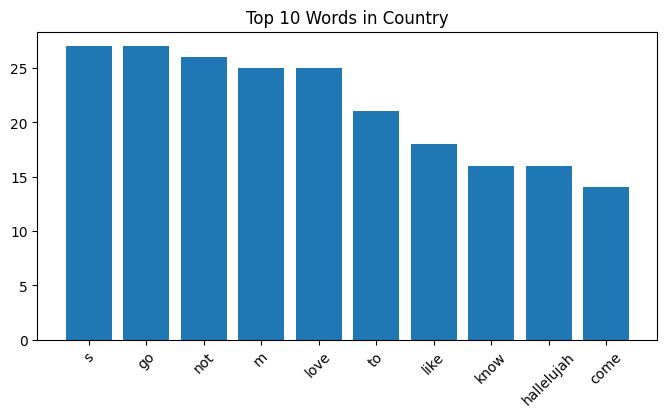

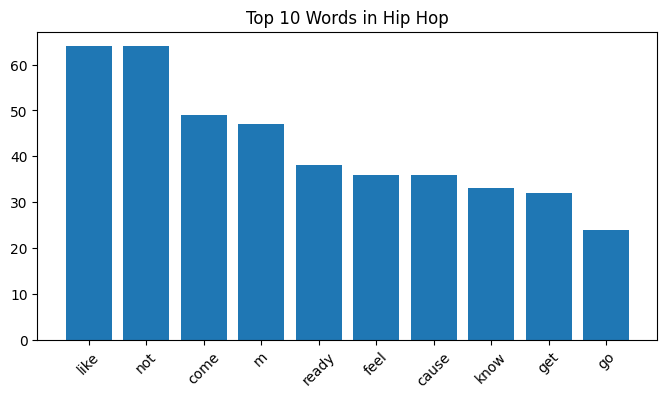

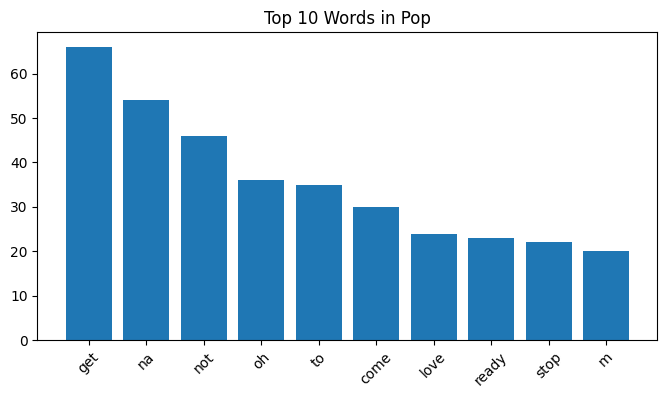

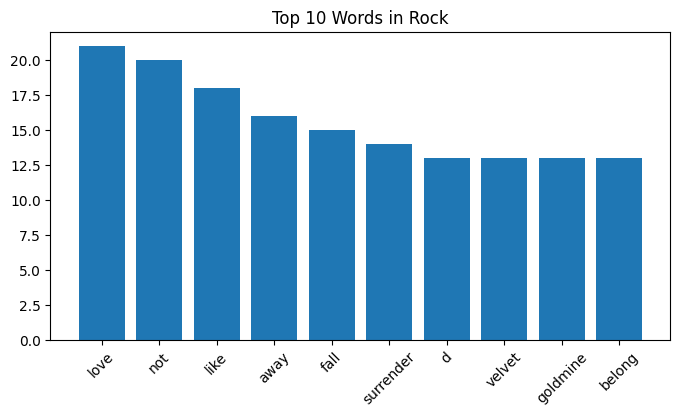

In [50]:
import matplotlib.pyplot as plt

for genre, freq in genre_word_freq.items():
    top_words = freq.most_common(10)
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts)
    plt.title(f"Top 10 Words in {genre}")
    plt.xticks(rotation=45)
    plt.show()

# Step 4. Analysis by categories

In [51]:
categories = {
    "time_of_day": ["morning", "day", "evening", "night", "midnight", "sunrise", "sunset"],
    "seasons": ["winter", "spring", "summer", "autumn", "fall"],
    "body_parts": ["eyes", "heart", "hand", "hands", "face", "head", "mouth", "lips", "body", "feet"]
}


In [52]:
# Create a nested dictionary: {genre: {category: count}}
category_counts = {}

for genre, group in sample_df.groupby("Main_Genre"):
    all_words = [word for tokens in group["Tokens"] for word in tokens]
    genre_counter = Counter(all_words)
    
    category_counts[genre] = {}
    for category, words in categories.items():
        category_counts[genre][category] = sum(genre_counter[w] for w in words)


In [53]:
category_df = pd.DataFrame(category_counts).T  # Transpose so genres are rows
category_df


,time_of_day,seasons,body_parts
Country,11,3,33
Hip Hop,7,9,38
Pop,37,10,10
Rock,15,15,19


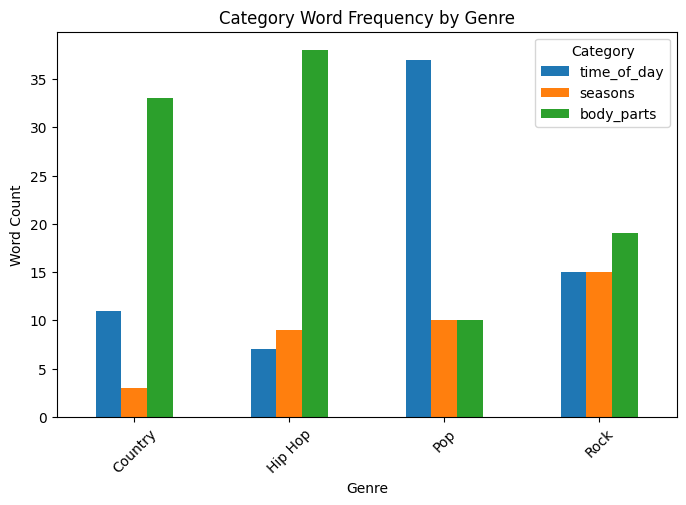

In [54]:
category_df.plot(kind='bar', figsize=(8,5))
plt.title("Category Word Frequency by Genre")
plt.xlabel("Genre")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


# Step 5. Search for rare words

In [ ]:
from collections import Counter
import pandas as pd

# Compute frequency for each genre
genre_word_freq = {}
for genre in sample_df['Main_Genre'].unique():
    text = " ".join(sample_df[sample_df['Main_Genre'] == genre]['Cleaned_Lyric'].fillna("").astype(str))
    tokens = text.split()
    genre_word_freq[genre] = Counter(tokens)

# Create sets of all unique words for each genre
genre_word_sets = [set(freq.keys()) for freq in genre_word_freq.values()]

# Safely compute intersection across all genre word sets
if len(genre_word_sets) == 0:
    common_words = set()
elif len(genre_word_sets) == 1:
    common_words = genre_word_sets[0]
else:
    common_words = genre_word_sets[0].intersection(*genre_word_sets[1:])

print("Genres considered:", list(genre_word_freq.keys()))
print("Words common to all genres:", len(common_words))

# Find words that appear ≤ 3 times in every genre
rare_words = [
    w for w in common_words
    if all(genre_word_freq[genre].get(w, 0) <= 3 for genre in genre_word_freq)
]

print(f"Rare words across all genres (occur ≤3 times per genre): {len(rare_words)}")
print("Example rare words:", rare_words[:50])

# (Optional) Export to CSV
pd.DataFrame(rare_words, columns=["Rare_Word"]).to_csv("rare_words_across_genres.csv", index=False)
print("✅ Saved to 'rare_words_across_genres.csv'")


Genres considered: ['Country', 'Hip Hop', 'Pop', 'Rock']
Words common to all genres: 76
Rare words across all genres (occur ≤3 times per genre): 11
Example rare words: ['miss', 'sit', 'old', 'care', 'dream', 'fly', 'stay', 'pain', 'clear', 'sleep', 'past']
✅ Saved to 'rare_words_across_genres.csv'
